In [20]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [21]:
## Importing the Dataset
bank=pd.read_csv(r"C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\06 Logistic Regression\bank-full.csv",sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
## select columns
columns = ['age', 'balance', 'duration', 'campaign', 'y']
bank_sel = bank[columns]
bank_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='age'>

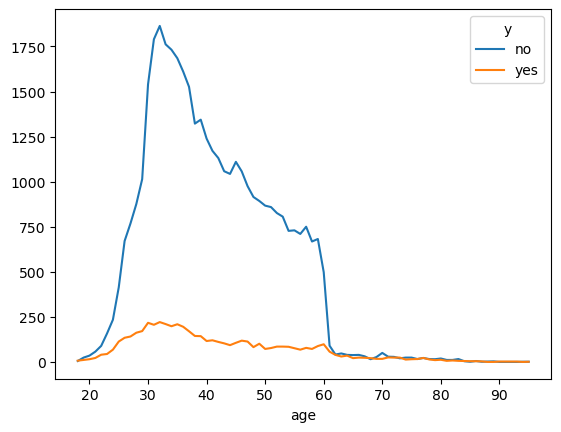

In [6]:
pd.crosstab(bank_sel.age,bank_sel.y).plot(kind="line")

In [7]:
## graph shows that age group 20-60 has more rejection of application while 60-90 almost everybody.



<AxesSubplot:>

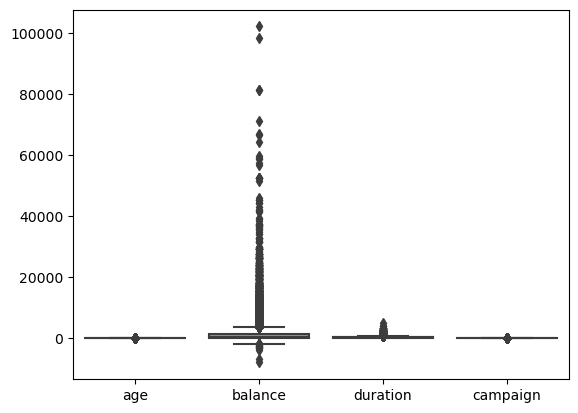

In [8]:
sns.boxplot(data =bank_sel,orient = "v")

In [9]:
bank_sel['outcome'] = bank_sel.y.map({'no':0, 'yes':1})
bank_sel.tail(10)

C:\Users\Amit D\AppData\Local\Temp\ipykernel_20108\81721043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_sel['outcome'] = bank_sel.y.map({'no':0, 'yes':1})


,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


<AxesSubplot:title={'center':'age'}, xlabel='outcome'>

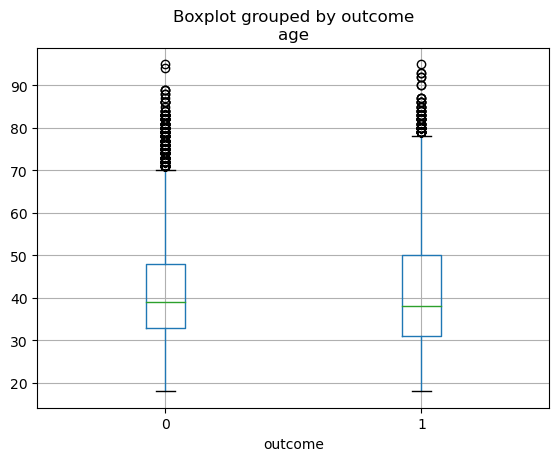

In [10]:
bank_sel.boxplot(column='age', by='outcome')

In [11]:
## probably not a great feature since lot of outliers

In [12]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = bank_sel[feature_col]
Y = bank_sel[output_target]

In [13]:
classifier = LogisticRegression()

In [14]:
classifier.fit(X,Y)

C:\Users\Amit D\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [15]:
# coefficients of features
classifier.coef_ 

array([[ 7.69722417e-03,  3.72191045e-05,  3.54908924e-03,
        -1.39828343e-01]])

In [16]:
# Probability values
classifier.predict_proba (X) 

array([[0.87367388, 0.12632612],
       [0.92488732, 0.07511268],
       [0.94596321, 0.05403679],
       ...,
       [0.30553757, 0.69446243],
       [0.82336233, 0.17663767],
       [0.86407826, 0.13592174]])

In [17]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
confusion_matrix = confusion_matrix(Y,y_pred)

In [19]:
print (confusion_matrix)

[[39342   580]
 [ 4435   854]]


Text(0.5, 15.0, 'Predicted Label')

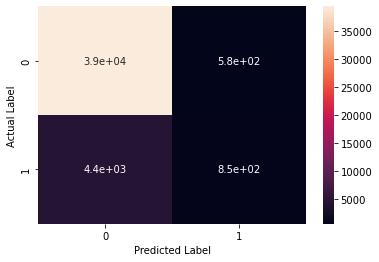

In [60]:
sns.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')